# Missing Values - Feature Engineering


#### What are the different types of Missing Data?

<b>1. Missing Completely at Random, MCAR:</b><br/>
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data point are a random subset of the data. There is nothing systemantic going on that makes some data more likely to be missing than other.

If the values for observations are missing completely at random, then disregarding those cases would not bias the inferences made.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
path = os.chdir('..')
path = os.path.join(os.getcwd(),'Datasets\\titanic.csv')
path

'D:\\Babin\\Internship\\Fusemachine-Internship\\Data Science\\Datasets\\titanic.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visualizing Missing Values

In [7]:
import missingno as msno

<AxesSubplot:>

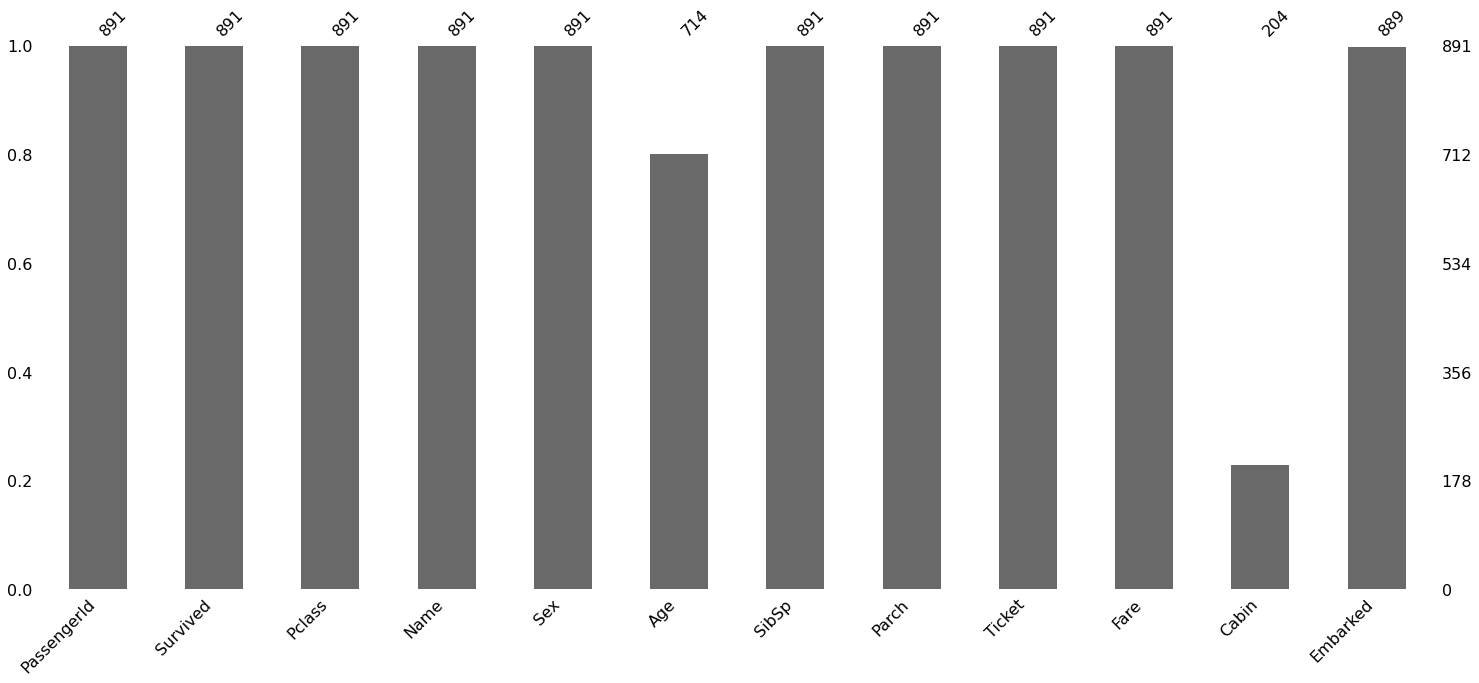

In [8]:
msno.bar(df)

In [9]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### 2. Missing Data Not At Random(MNAR): Systematic Missing Values
There is a absolutely some realtionship between the data missing and any other values, observed or missing, within the dataset.
Eg:- Cabin and Age

In [11]:
df['cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)

In [12]:
#find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [14]:
df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [15]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

Here, this means that from the survived (1) people, 60% of cabin values are missing and from the not survied (0)people, about 87% of cabin values are missing.

#### Missing At Random (MAR):
Men --hide their salary
Women ----hide their age

### All the techniques of handling missing values
1. Mean/ Median/ Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent Categories Imputation

## Mean/Median/Mode Imputation
When should we apply?<br/>
-> Mean/Median Imputation has the assumption that the data are missing completely at random (MCAR). We solve this my replacing the NAN with  the most frequent occurance of the variables.

In [16]:
df = pd.read_csv(path, usecols=['Age', 'Fare', 'Survived'])

In [17]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [19]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [20]:
def impute_nan(df, variable,median):
    df[variable+'_median'] = df[variable].fillna(median)

In [21]:
median = df.Age.median()
median

28.0

In [22]:
impute_nan(df,'Age', median)

In [23]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [24]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

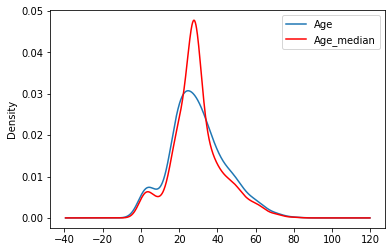

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

This plot shows us that after we have imputed the null values with median then we see that most of the values are concentrated around 28.

### Advantages and Disadvantages of Mean/Median Imputation

## Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

## Random Sample Imputation

Random Sample Imputation consists of taking random observation from the dataset and we use this observation to replace the nan values. <br/>
When should it be used?<br/>
It assumes that the data are missing completely at random (MCAR).

In [27]:
df = pd.read_csv(path, usecols=['Age','Fare','Survived'])

In [28]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [30]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [31]:
df['Age'].dropna().unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [32]:
df['Age'].dropna().sample()

247    24.0
Name: Age, dtype: float64

In [33]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [34]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [35]:
def impute_nan(df, variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random']  = df[variable]
    ##It will have the random sample to fill tha na values
    random_sample =df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [36]:
median = df.Age.median()
median

28.0

In [37]:
impute_nan(df, 'Age', median)

In [38]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


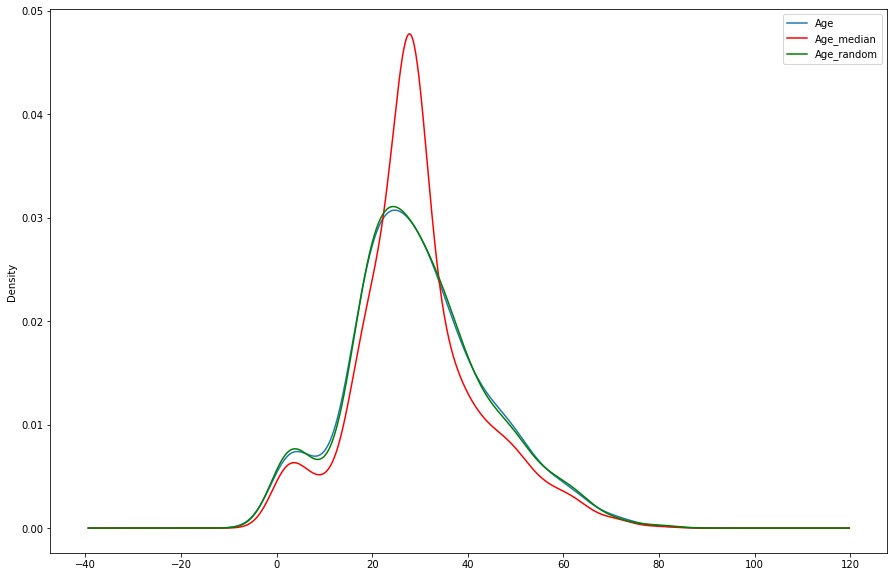

<Figure size 1080x1080 with 0 Axes>

In [39]:
fig = plt.figure(figsize=(15,10))
plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax, color='red')
df.Age_random.plot(kind='kde',ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
1. Easy to implement
2. There is no distortion in variance

#### Disadvantages
1. In every situation randomness won't work

## Capturing NaN values with a new feature

It works well if the data are not missing completely at random.

In [40]:
df = pd.read_csv(path, usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [41]:
df['Age_NAN'] = np.where(df['Age'].isnull(), 1,0)

In [42]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [43]:
df.Age.median()

28.0

In [44]:
df['Age'].fillna(df.Age.median(), inplace = True)
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

## End of Distribution Imputation

In [45]:
df = pd.read_csv(path, usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

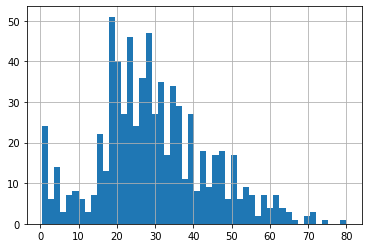

In [46]:
df.Age.hist(bins = 50)

In [47]:
df.Age.mean()

29.69911764705882

In [48]:
df.Age.std()

14.526497332334042

In [49]:
df.Age.mean()+3*df.Age.std()

73.27860964406094

In [50]:
df.Age.mean()-3*df.Age.std()

-13.880374349943303

In [51]:
df[df['Age']>=73.27]

,Survived,Age,Fare
630,1,80.0,30.000
851,0,74.0,7.775


C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

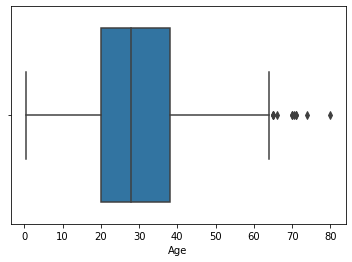

In [52]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [53]:
def impute_nan(df, variable,median, extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [54]:
extreme = df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

In [55]:
impute_nan(df, 'Age', df.Age.median(), extreme)

In [56]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

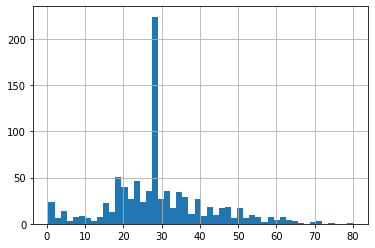

In [57]:
df['Age'].hist(bins=50)

<AxesSubplot:>

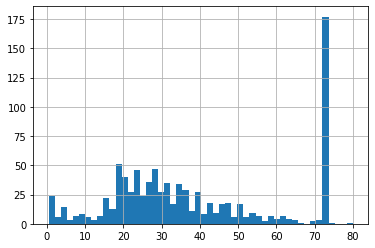

In [58]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

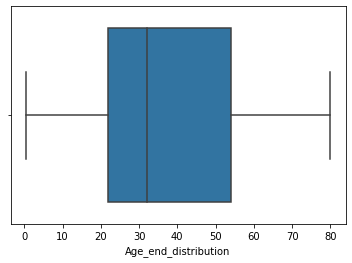

In [59]:
sns.boxplot('Age_end_distribution', data=df)

### Advantages
1. Easy to implement
2. Captures the importance of missingness if there is one

### Disadvantages
1. Distorts the original distribution of the variable
2. If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is big, it will mask true outliers in the distribution
4. If number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering

## Arbitrary Value Imputation

It consists of replacing NAN by an arbitrary value

In [60]:
df = pd.read_csv(path, usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [61]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [62]:
def impute_nan(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

<AxesSubplot:>

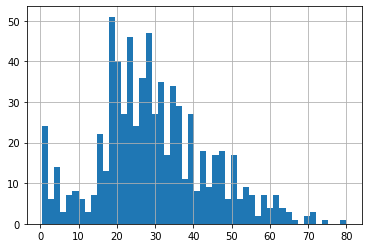

In [63]:
df['Age'].hist(bins=50)

In [64]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [65]:
impute_nan(df, 'Age')

In [66]:
df

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,0.0,100.0
889,1,26.0,30.0000,26.0,26.0


<AxesSubplot:>

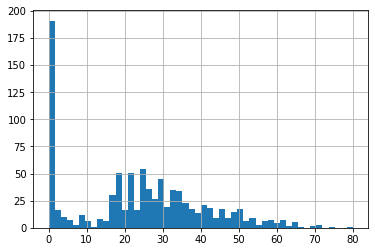

In [67]:
df['Age_zero'].hist(bins=50)

<AxesSubplot:>

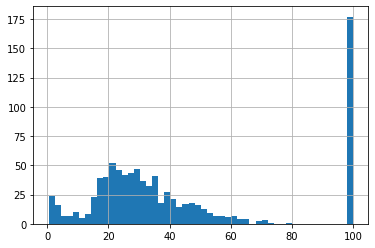

In [68]:
df['Age_hundred'].hist(bins=50)

### Arbitrary values
#### 1. It should not be more frequently present
### Advantages
1. Easy to Implement
2. Captures the importance of missigness if there is one

### Disadvantages
1. Distorts the original distribution of the variable
2. If missingness is not important, it may mask the predictive power of the original variable by distortion.
3. Hard to decide which value to use

# How to Handle Categorical Missing Values

#### Frequent Category Imputation

In [69]:
path = 'D:\\Babin\\Internship\\Fusemachine-Internship\\Data Science\\Datasets\\loan.csv'
path

'D:\\Babin\\Internship\\Fusemachine-Internship\\Data Science\\Datasets\\loan.csv'

In [70]:
df  = pd.read_csv(path, usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [71]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [72]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [73]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

#### Compute the frequency with every feature

In [74]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

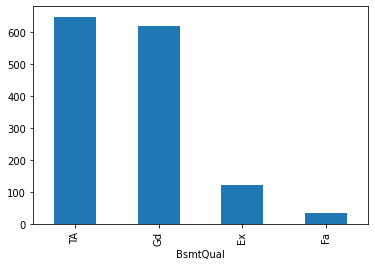

In [75]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

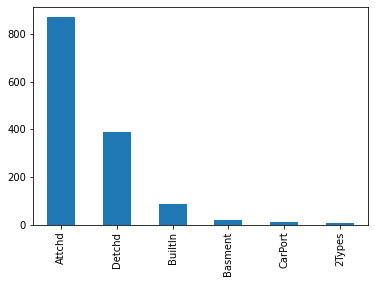

In [76]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

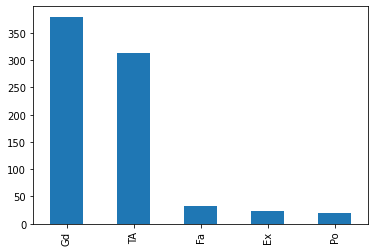

In [77]:
df['FireplaceQu'].value_counts().plot.bar()

In [78]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [79]:
df['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [80]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [81]:
#### Replacing function
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace = True )

In [82]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [83]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [84]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Advantages
1. Easy to implement
2. Faster way to implement

#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over represented way if there are many NANs.
2. It distorts the relationship of the most frequent label.

#### Adding a variable to capture NAN

In [85]:
df  = pd.read_csv(path, usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [86]:
import numpy as np
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [87]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [88]:
df['BsmtQual'].mode()

0    TA
dtype: object

In [89]:
frequent = df['BsmtQual'].mode()[0]
frequent

'TA'

In [90]:
df['BsmtQual'].fillna(frequent, inplace = True)

In [91]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [92]:
df['FireplaceQu_Var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace = True)

In [93]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [94]:
df.isnull().sum()

BsmtQual            0
FireplaceQu         0
GarageType         81
SalePrice           0
BsmtQual_Var        0
FireplaceQu_Var     0
dtype: int64

#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [95]:
df  = pd.read_csv(path, usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [96]:
def impute_nan(df, variable):
    df[variable+'_newVar'] = np.where(df[variable].isnull(), 'Missing',df[variable])

In [97]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [98]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newVar,FireplaceQu_newVar,GarageType_newVar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd
1458,TA,NaN,Attchd,142125,TA,Missing,Attchd


In [99]:
df.drop(['BsmtQual', 'FireplaceQu','GarageType'], axis = 1)

,SalePrice,BsmtQual_newVar,FireplaceQu_newVar,GarageType_newVar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


In [100]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newVar,FireplaceQu_newVar,GarageType_newVar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


### Imputing Missing values using sklearn

In [101]:
path = 'D:\\Babin\\Internship\\Fusemachine-Internship\\Data Science\\Datasets\\titanic.csv'
df = pd.read_csv(path)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
# df = df[['Age','Cabin','Fare']]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

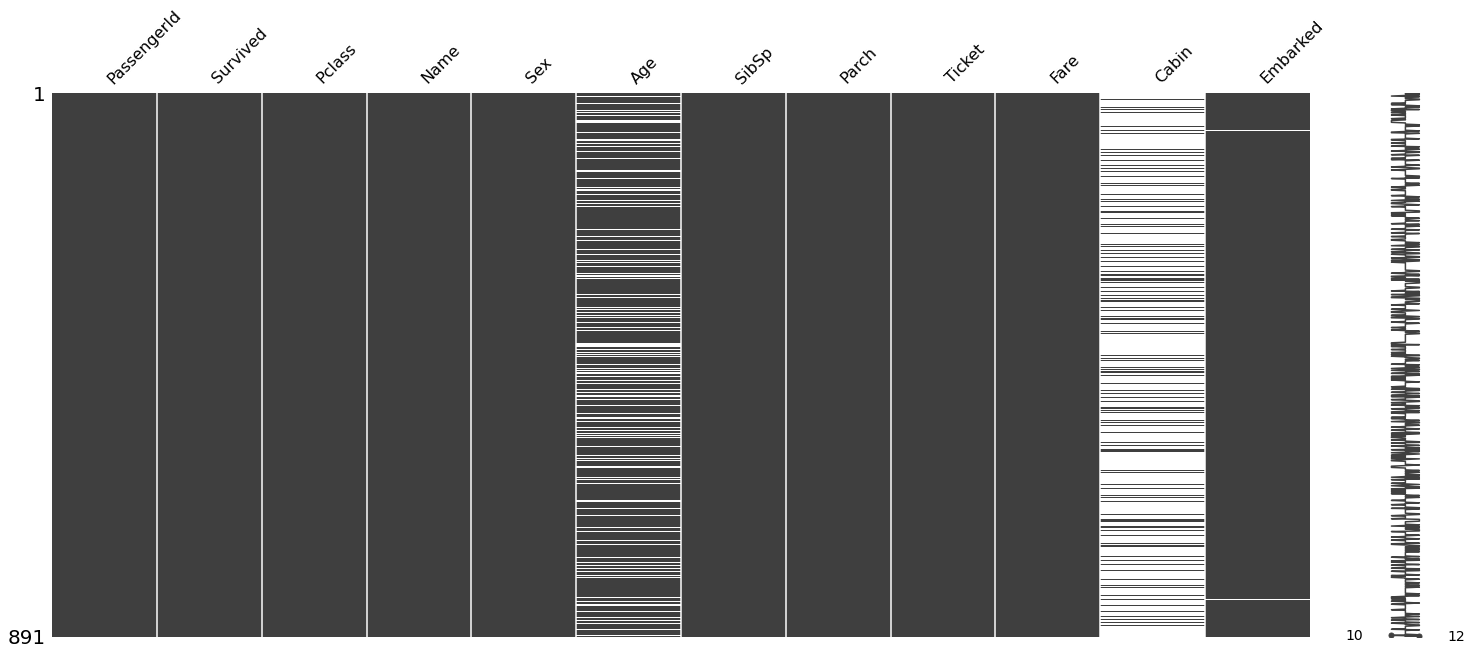

In [104]:
msno.matrix(df)

<AxesSubplot:>

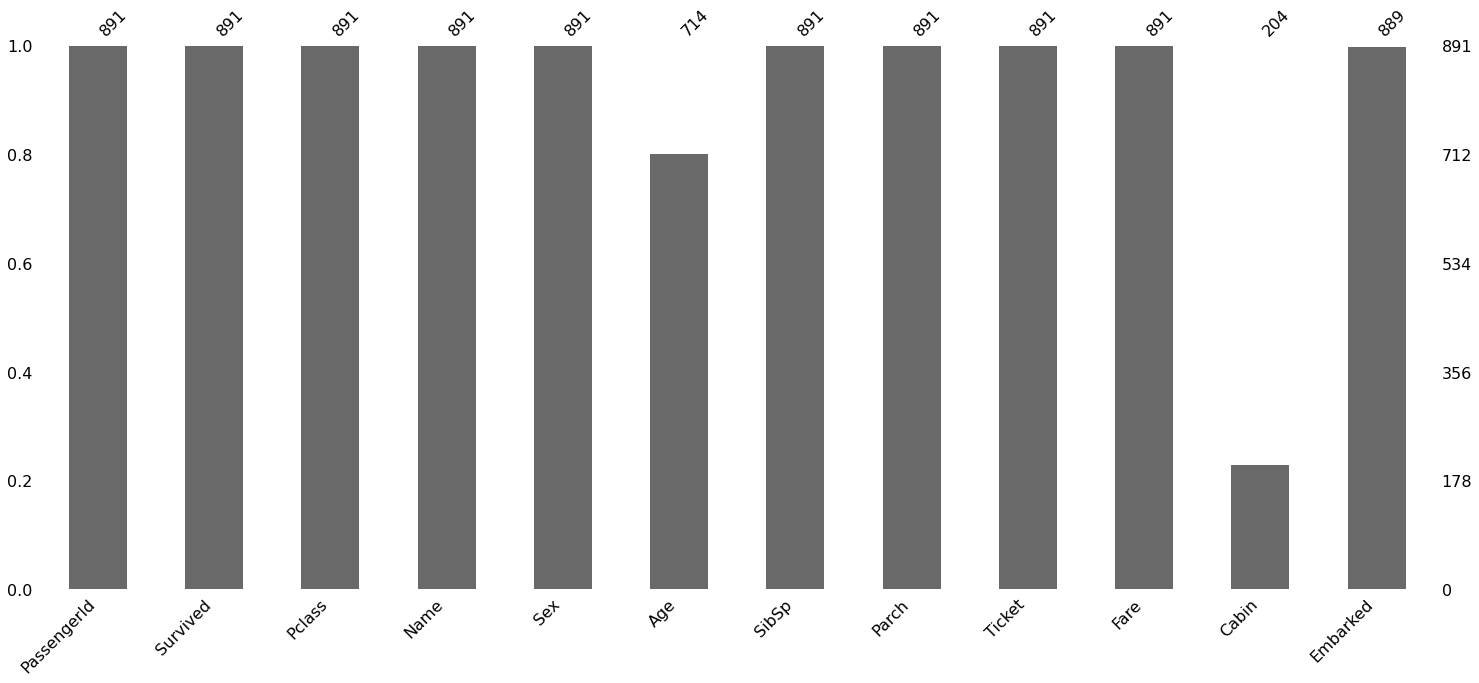

In [105]:
msno.bar(df)

In [106]:
from sklearn import impute

<h3><b>sklearn.imptue</b></h3> contains transformers for missing value imputation</h3>
<ol>
    <li>SimpleImputer - Imputation transformrer for completing missing values</li>
    <li>Iterative Imputer - Multivariate imputer that estimates each feature from all the others</li>
    <li>MissingIndicator - Binary indicators for missing vluaes </li>
    <li>KNNImputer - Imputation for completing missing vlaues using k-Nearest Neigbors</li>
</ol>

#### Simple Imputer
 -  It is a univariate type of imputation algorithm , which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer).

<AxesSubplot:xlabel='Age', ylabel='Density'>

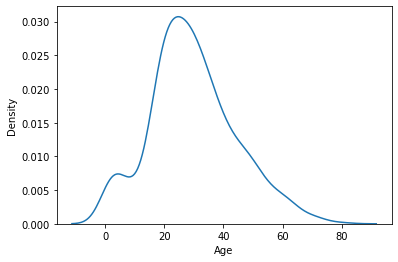

In [107]:
sns.kdeplot(df['Age'])

In [108]:
simple_imp_mean = impute.SimpleImputer(missing_values=np.nan,strategy='mean')
simple_imp_mean

SimpleImputer()

In [109]:
simple_imp_mean.fit(df[['Age']])

SimpleImputer()

In [110]:
df['Age_Simple'] = pd.DataFrame(simple_imp_mean.transform(df[['Age']]))

In [111]:
df['Age_Simple']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age_Simple, Length: 891, dtype: float64

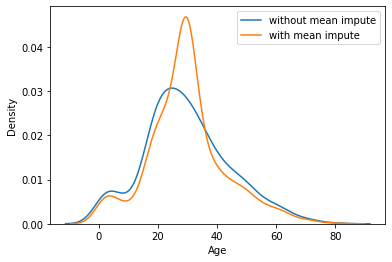

In [112]:
sns.kdeplot(df['Age'],label='without mean impute')
sns.kdeplot(df['Age_Simple'],label='with mean impute')
plt.legend()

#### Iterative Imputer
- It is a multivariate type of imputation algorithm that uses the entire set of available feature dimensions to estimate the missing values  

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [113]:
from sklearn.experimental import enable_iterative_imputer

In [114]:
iterative_imp = impute.IterativeImputer(random_state=0,initial_strategy='median')
iterative_imp

IterativeImputer(initial_strategy='median', random_state=0)

In [115]:
iterative_imp.fit(df[['Age']])

IterativeImputer(initial_strategy='median', random_state=0)

In [116]:
df['Age_Iterative'] = iterative_imp.transform(df[['Age']])

In [117]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Simple,Age_Iterative
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.000000,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.000000,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.699118,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.000000,26.0


In [118]:
df['Age_Simple'] ==df['Age_Iterative']

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Length: 891, dtype: bool

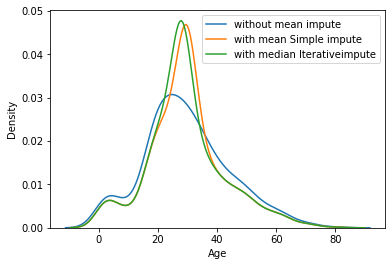

In [119]:
sns.kdeplot(df['Age'],label='without mean impute')
sns.kdeplot(df['Age_Simple'],label='with mean Simple impute')
sns.kdeplot(df['Age_Iterative'],label='with median Iterativeimpute')
plt.legend()

### MissingIndicator

<b>Note: </b> This should not be used in a vanilla Pipeline consisting of transformers and a classifier, but rather could be added using a FeatureUnion or ColumnTransformer

In [120]:
df[df.Age.isnull()].head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Simple,Age_Iterative
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,29.699118,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,29.699118,28.0


In [121]:
indicator = impute.MissingIndicator()

In [122]:
indicator.fit(df[['Age']])

MissingIndicator()

In [123]:
df['Age_MissingIndicator'] = indicator.transform(df[['Age']])

In [124]:
df.Age.isnull().sum()

177

In [125]:
df['Age_MissingIndicator'].sum()

177

In [126]:
indicator.get_params()

{'error_on_new': True,
 'features': 'missing-only',
 'missing_values': nan,
 'sparse': 'auto'}

In [127]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Simple,Age_Iterative,Age_MissingIndicator
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,False


#### KNNImputer

In [128]:
knnimputer = impute.KNNImputer(n_neighbors=2,weights='distance')
df['Age_knnImputer'] = knnimputer.fit_transform(df[['Age']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Simple,Age_Iterative,Age_MissingIndicator,Age_knnImputer
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,False,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,False,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,False,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,False,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,False,35.0


<AxesSubplot:xlabel='Age_knnImputer', ylabel='Density'>

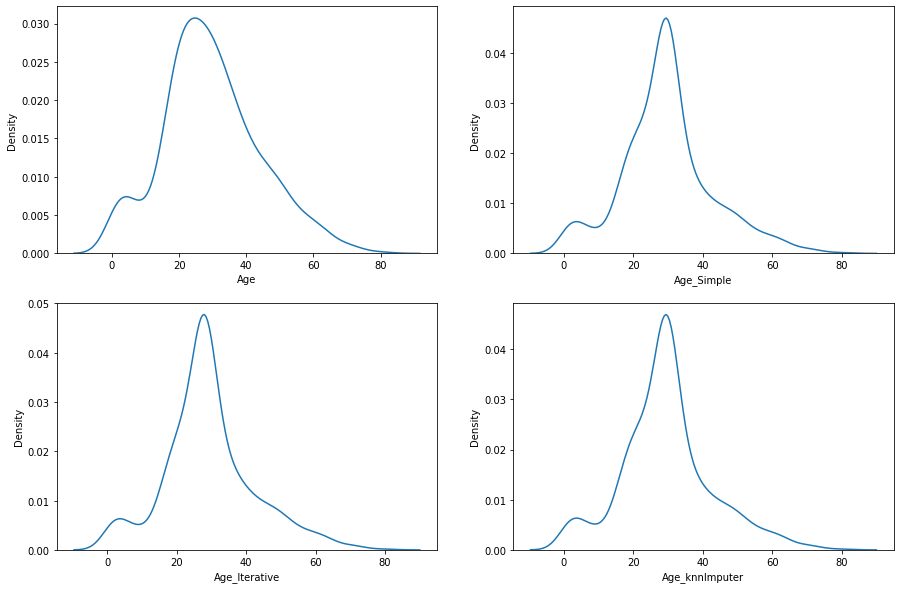

In [129]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.kdeplot(df['Age'],label='without mean impute',ax=ax[0][0])
sns.kdeplot(df['Age_Simple'],label='SimpleImputer',ax=ax[0][1])
sns.kdeplot(df['Age_Iterative'],label='IterativeImputer',ax=ax[1][0])
sns.kdeplot(df['Age_knnImputer'],label='KNNImputer',ax=ax[1][1])